<h1> TUTORIAL TWO: </h1>
<h1> RUNNING GP BACKGROUNDS </h1>
<h3> Author: Lindsey Gordon. Last Update: 1-4-23 </h3>

How to run this with GP background modelling

In [1]:
#load in modules
import numpy as np
from etsfit import etsfit
import etsfit.utils.utilities as ut
import pandas as pd

2018hzh 04 3 1


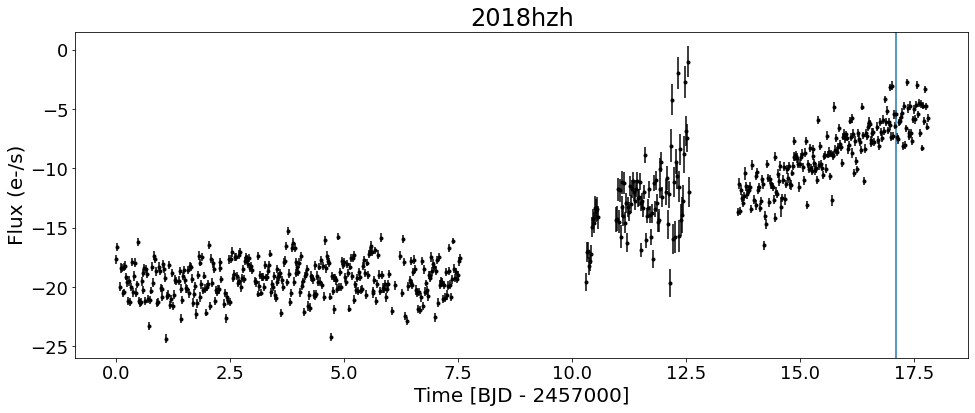

In [6]:
# THINGS YOU SAW IN TUTORIAL 1
#TNS info:
TNSFile = "./tutorial_data/2018hzh_TNS.csv"
TNSinfo = pd.read_csv(TNSFile)
#data file:
dataFile = "./tutorial_data/2018hzh0431-tessreduce"

#saving into our local folder
folderSave = "."

#load data:
(time, flux, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
#get the discovery time from the TNSFile
discoverytime = ut.get_disctime(TNSFile, targetlabel)

#make an etsfit instance
ets = etsMAIN(folderSave, TNSFile)
             
#load the data in                           
ets.load_single_lc(time, flux, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filt = ets.window_rms_filt(plot=False)

#set the fit type to 11 for gp usage
ets.pre_run_clean(11, flux_mask=filt, 
                    binning = False, fraction = 0.6)
                
ets.test_plot()

The next cell demos how to run one of the GP fits. Currently only a single power law is supported as the base model. 

There are four GP options: 'celerite_residual' (celerite matern 3/2, iterative residual fitting), 'celerite_mean' (celerite matern 3/2 with a mean model fitting), 'expsqr' (tinygp), 'expsinsqr' (tinygp), and 'matern32' (tinygp)

Bounds parameter: true/false boolean to use tightly bound or not tightly bound GP parameters

cbounds parameter: (custom bounds) either a dict or None. if a dict, contains (upper,lower) bounds for 'log_sigma', 'log_rho', and a string 'boundlabel'

In [8]:
gpUSE = "celerite_residual"
rho_bounds = np.log((0.25, 10)) #0, 2.302
sigma_bounds = np.log( np.sqrt((0.1, 20)) ) #sigma range 0.316 to 4.47, take log
bounds_dict = dict(log_sigma=sigma_bounds, log_rho=rho_bounds, boundlabel="-0-25day")

ets.run_GP_fit(n1=10000, n2=30000, gpUSE=gpUSE, bounds=True, 
                               cbounds=bounds_dict)


{'log_sigma': array([-1.15129255,  1.49786614]), 'log_rho': array([-1.38629436,  2.30258509]), 'boundlabel': '-0-25day'}
saving into folder:  ./2018hzh0431/celerite-matern32-residual-0.6-bounded-0-25day/
Initial log-likelihood: -5294.779672869012
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


100%|█████████████████████████████████████| 30000/30000 [10:10<00:00, 49.11it/s]


150000 samples post second run
t0 6.477824035165942 -0.11605349195357029 0.0837583406211202
A 0.4862828986606268 -0.03858759303782866 0.04227323765406299
beta 1.39995153759904 -0.02824990540071126 0.030899916861119037
b -20.350617637291087 -0.021393593966866575 0.023798366117482317
$log\sigma$ 1.4970975120921413 -0.001578474364583693 0.0007192070427570751
$log\rho$ -1.3855517185628328 -0.0005634302414256886 0.0022012530510440165
log prob: [-7838.15096646]
BAYESIAN INF CRIT:  -15637.66583070039


6.477824035165942
0.4862828986606268
1.39995153759904
-20.350617637291087
1.4970975120921413
-1.3855517185628328
